# Instalacion de pandas

In [2]:
!pip install pandas

# instalacion de Matplotlib

In [3]:
!pip install matplotlib

In [5]:
#cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# cargamos datos desde un .csv
dataset= pd.read_csv("hotel_bookings.csv")
dataset.head() #metodo

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
dataset.shape #atributo

(119390, 32)

In [9]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
dataset["hotel"]

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

In [17]:
dataset["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [19]:
dataset["hotel"].value_counts(normalize=True)

hotel
City Hotel      0.664461
Resort Hotel    0.335539
Name: proportion, dtype: float64

In [21]:
dataset.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [23]:
dataset.meal.value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [26]:
meals=dataset.meal.value_counts(normalize=True)
meals

meal
BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: proportion, dtype: float64

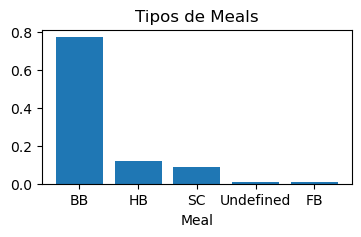

In [32]:
x= list(meals.index)
plt.figure(figsize=(4,2))
plt.bar(x,meals)
plt.title("Tipos de Meals")
plt.xlabel("Meal")
plt.show()

In [15]:
type(dataset["hotel"])

pandas.core.series.Series

In [13]:
type(dataset)

pandas.core.frame.DataFrame

In [35]:
subDataset= dataset[["meal","adults", "hotel", "country"]]
subDataset.head()

,meal,adults,hotel,country
0,BB,2,Resort Hotel,PRT
1,BB,2,Resort Hotel,PRT
2,BB,1,Resort Hotel,GBR
3,BB,1,Resort Hotel,GBR
4,BB,2,Resort Hotel,GBR


In [33]:
subDataset= dataset[["meal","adults"]]

,meal,adults
0,BB,2
1,BB,2
2,BB,1
3,BB,1
4,BB,2
...,...,...
119385,BB,2
119386,BB,3
119387,BB,2
119388,BB,2


In [38]:
subDataset.loc[[1,2,10,150,1500],["country","hotel"]]

,country,hotel
1,PRT,Resort Hotel
2,GBR,Resort Hotel
10,PRT,Resort Hotel
150,PRT,Resort Hotel
1500,PRT,Resort Hotel


In [39]:
subDataset.iloc[[1,10,100,1000,10000],[2,0]]

,hotel,meal
1,Resort Hotel,BB
10,Resort Hotel,BB
100,Resort Hotel,BB
1000,Resort Hotel,HB
10000,Resort Hotel,BB


In [44]:
# por los valores diferentes de la columa es mas que 30, la columna tiene escala continual
len(dataset["adr"].unique()) 

8879

In [43]:
# por los valores diferentes de la columa es menor que 30, la columna tiene escala Discreta
len(dataset["is_canceled"].unique())

2

In [45]:
# variable continua.
len(dataset["agent"].unique())

334

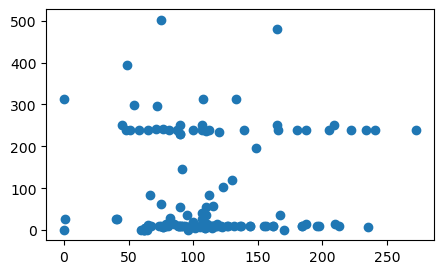

In [52]:
plt.figure(figsize=(5,3))
dataTemp= dataset.loc[np.random.randint(1, len(dataset), 150),["adr","agent"]]
plt.scatter(x=dataTemp["adr"], y=dataTemp["agent"])
plt.show()

# Instalacion de saborn

In [53]:
!pip install seaborn

In [54]:
import seaborn as sns

In [55]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


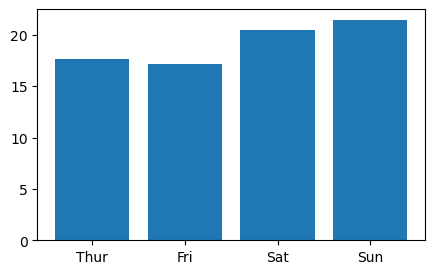

In [58]:
#usando matplotlib
bill_x_day =tips.groupby("day").mean("total_bill")["total_bill"] 
x= list(bill_x_day.index)
plt.figure(figsize=(5,3))
plt.bar(x, bill_x_day)
plt.title("")
plt.xlabel("")
plt.show()

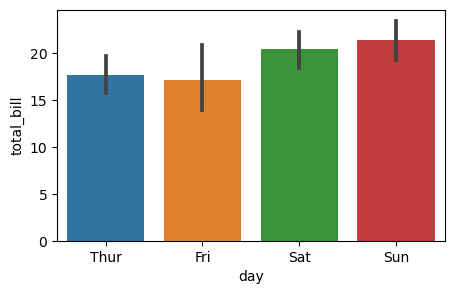

In [59]:
plt.figure(figsize=(5,3))
sns.barplot(data=tips,x="day", y="total_bill")
plt.show()

### cuenta total versus propina

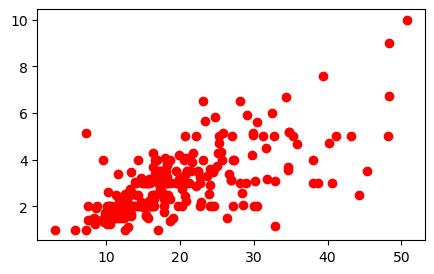

In [64]:
plt.figure(figsize=(5,3))
plt.scatter(x=tips["total_bill"], y=tips["tip"], c="r")
plt.show()

In [65]:
tips["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [68]:
tips[(tips["time"] == "Dinner")&(tips["sex"]=="Female")&(tips["size"]>=3)]

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
16,10.33,1.67,Female,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
33,20.69,2.45,Female,No,Sat,Dinner,4
37,16.93,3.07,Female,No,Sat,Dinner,3
52,34.81,5.20,Female,No,Sun,Dinner,4
71,17.07,3.00,Female,No,Sat,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
114,25.71,4.00,Female,No,Sun,Dinner,3


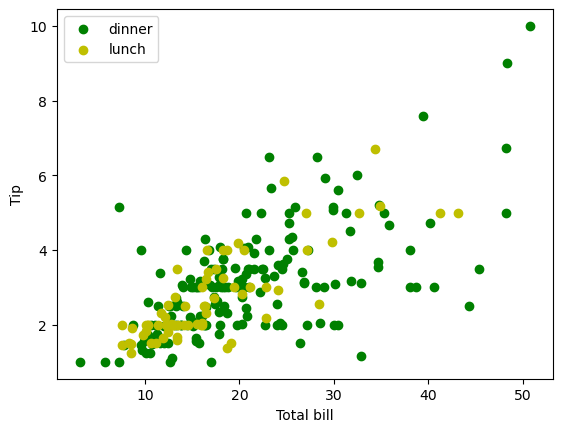

In [72]:
dinner = tips[tips["time"]=="Dinner"]
lunch= tips[tips["time"]=="Lunch"]

plt.scatter(x=dinner["total_bill"], y=dinner["tip"], c="g", label="dinner")
plt.scatter(x=lunch["total_bill"], y=lunch["tip"], c="y", label="lunch")
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.legend()
plt.show()

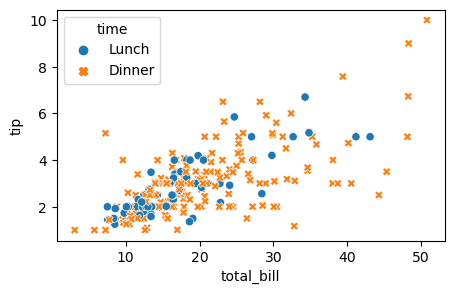

In [74]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")
plt.show()

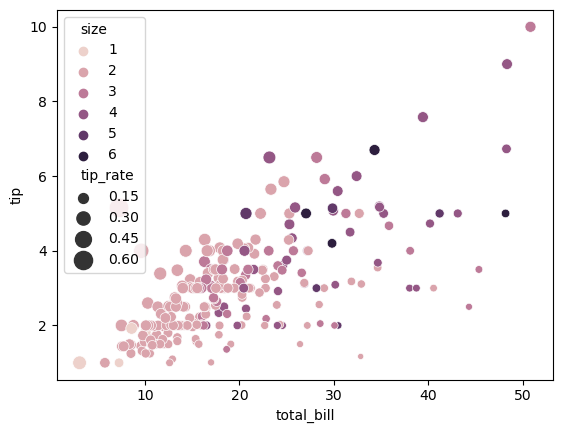

In [79]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="tip_rate", sizes=(20 , 200))
plt.show()

In [75]:
# agregamos columna nueva
tips["tip_rate"] = tips["tip"]/tips["total_bill"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


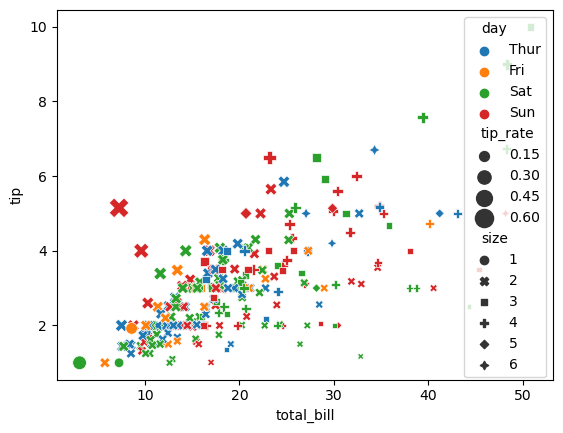

In [82]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", size="tip_rate", style="size", sizes=(20 , 200))
plt.show()